# NATURAL LANGUAGE PROCESSING

In [16]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [4]:
ms= pd.read_csv(r"C:\Users\Khushi\Desktop\spam.csv", encoding = 'cp1252')

In [5]:
ms.shape

(6776, 5)

In [6]:
ms = ms.iloc [:, [0,1]]  ## remove last 3 columns

In [7]:
ms.shape

(6776, 2)

In [8]:
ms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
ms.rename(columns = {"v1": "label",  "v2" : "message"}, inplace = True)

# IMPORTaNT

In [10]:
ms.label.value_counts()  ### to get the frequency of all columns

ham     5854
spam     922
Name: label, dtype: int64

In [11]:
## apply on each row of that column
length = ms.message.apply(len)   ##  find the length of each message
length

0       111
1        29
2       155
3        49
4        61
5       148
6        77
7       160
8       158
9       154
10      109
11      136
12      156
13      196
14       35
15      149
16       26
17       81
18       58
19      156
20       41
21       49
22       53
23       88
24       57
25      144
26       30
27      134
28       75
29       64
       ... 
6746     40
6747     38
6748    154
6749     45
6750     42
6751    160
6752     34
6753     87
6754     43
6755     51
6756     91
6757     27
6758     98
6759    153
6760     63
6761    273
6762     22
6763     66
6764     33
6765     70
6766     96
6767     19
6768     67
6769     12
6770    147
6771    161
6772     37
6773     57
6774    125
6775     26
Name: message, Length: 6776, dtype: int64

In [12]:
ms = pd.concat([ms, length],axis=1)

In [13]:
ms.head()

,label,message,message
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
ms.columns.values[2] = "Length"  ## changing the column names

In [15]:
ms.head()

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Start NLP

In [16]:
from nltk.corpus import stopwords

In [17]:
stopwords.words("english")  ##to see the stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
import string

In [19]:
string.punctuation  ## show all the puctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# example



In [20]:
abc = " I want to ?  remove !!!! all the .... punctuaqtion marks $ from %%"

In [21]:
abc_refined = [ i for i in abc  if i not in string.punctuation]
abc_refined

[' ',
 'I',
 ' ',
 'w',
 'a',
 'n',
 't',
 ' ',
 't',
 'o',
 ' ',
 ' ',
 ' ',
 'r',
 'e',
 'm',
 'o',
 'v',
 'e',
 ' ',
 ' ',
 'a',
 'l',
 'l',
 ' ',
 't',
 'h',
 'e',
 ' ',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 'q',
 't',
 'i',
 'o',
 'n',
 ' ',
 'm',
 'a',
 'r',
 'k',
 's',
 ' ',
 ' ',
 'f',
 'r',
 'o',
 'm',
 ' ']

In [22]:
abc_refined = "".join(abc_refined)
abc_refined                              ##still in the form of sentences

' I want to   remove  all the  punctuaqtion marks  from '

In [23]:
##splitting the sentence
aa =  abc_refined.split()
aa

['I', 'want', 'to', 'remove', 'all', 'the', 'punctuaqtion', 'marks', 'from']

# end of example

# function to remove punctuation and stop words

In [24]:
def text_process(mess):
    """
    1. remove the punctuation
    2. remove the stop words
    3. return the list of clean textwords
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]

In [31]:
ms['message'].apply(text_process)  ### call the function

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, I, dont, think, goes, usf, lives, around...
5       [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6       [Even, brother, like, speak, They, treat, like...
7       [As, per, request, Melle, Melle, Oru, Minnamin...
8       [WINNER, As, valued, network, customer, select...
9       [Had, mobile, 11, months, U, R, entitled, Upda...
10      [Im, gonna, home, soon, dont, want, talk, stuf...
11      [SIX, chances, win, CASH, From, 100, 20000, po...
12      [URGENT, You, 1, week, FREE, membership, å£100...
13      [Ive, searching, right, words, thank, breather...
14             [I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]
15      [XXXMobileMovieClub, To, use, credit, click, W...
16                                    [Oh, kim, watching]
17      [Eh, u

# build the word cloud

In [32]:
from wordcloud import WordCloud

In [33]:
cloud = WordCloud().generate(str(ms['message']))

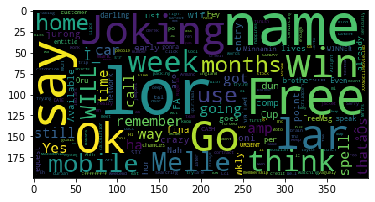

In [34]:
plt.imshow(cloud)

# --------------------------------------------------------------------

In [38]:
df_ham = ms[ms.label == 'ham']
df_ham.head()

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,ham,Even my brother is not like to speak with me. ...,77


In [51]:
wc = WordCloud(max_words=25)

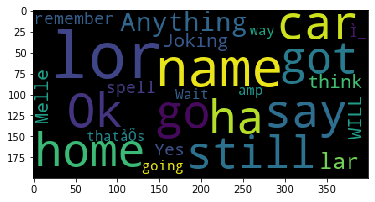

In [52]:
cloud1 = wc.generate(str(df_ham.message))
plt.imshow(cloud1)

In [43]:
df_spam = ms[ms.label == 'spam']
df_spam.head()

,label,message,Length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136


In [46]:
wc = WordCloud(max_words=10)

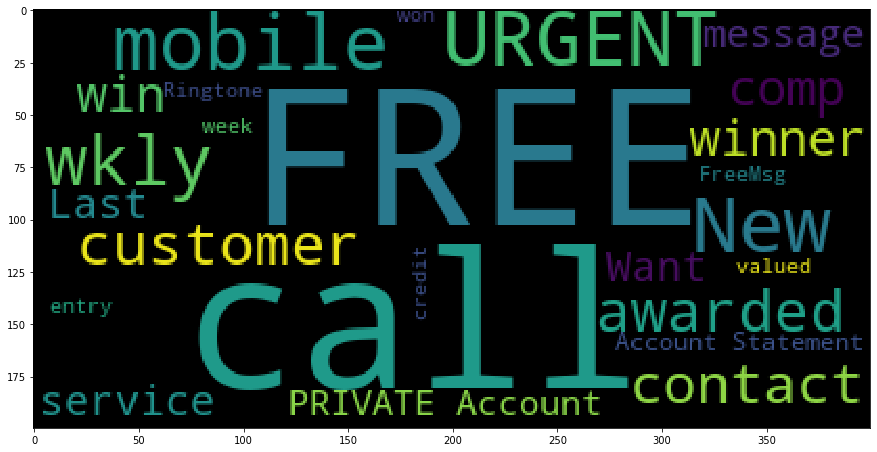

In [60]:
cloud2 = wc.generate(str(df_spam.message))
plt.figure(figsize = (15,15)) ## just to increase the size of the plot
plt.imshow(cloud2)

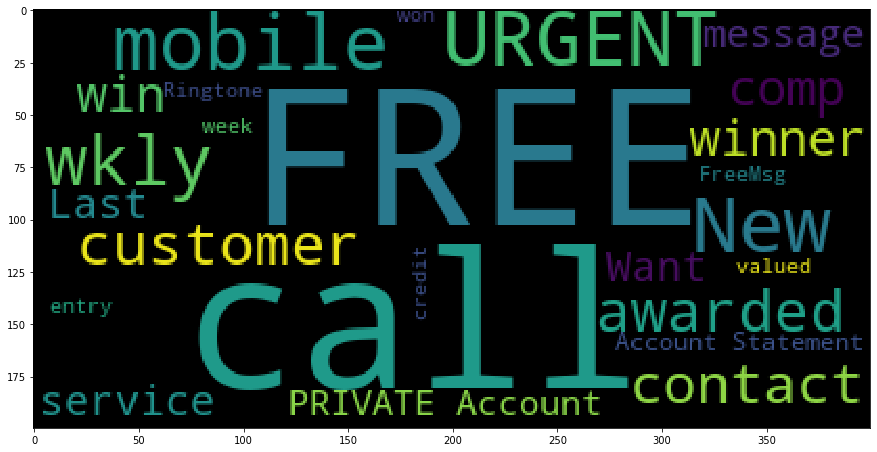

In [62]:
plt.figure(figsize = (15,15)) ## just to increase the size of the plot
plt.imshow(cloud1)

# MODEL BUILDING

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
bow_transformer = CountVectorizer(analyzer =  text_process).fit(ms["message"])

In [70]:
bow_transformer.vocabulary_  ## gives the count of each word



{'Go': 2078,
 'jurong': 7633,
 'point': 8986,
 'crazy': 5863,
 'Available': 1117,
 'bugis': 5314,
 'n': 8408,
 'great': 7023,
 'world': 11219,
 'la': 7744,
 'e': 6309,
 'buffet': 5313,
 'Cine': 1497,
 'got': 6992,
 'amore': 4754,
 'wat': 11021,
 'Ok': 3122,
 'lar': 7777,
 'Joking': 2489,
 'wif': 11128,
 'u': 10758,
 'oni': 8659,
 'Free': 1959,
 'entry': 6422,
 '2': 421,
 'wkly': 11179,
 'comp': 5713,
 'win': 11140,
 'FA': 1855,
 'Cup': 1565,
 'final': 6648,
 'tkts': 10574,
 '21st': 441,
 'May': 2843,
 '2005': 428,
 'Text': 4015,
 '87121': 858,
 'receive': 9320,
 'questionstd': 9227,
 'txt': 10746,
 'rateTCs': 9268,
 'apply': 4832,
 '08452810075over18s': 72,
 'U': 4140,
 'dun': 6296,
 'say': 9621,
 'early': 6314,
 'hor': 7268,
 'c': 5357,
 'already': 4731,
 'Nah': 2993,
 'I': 2321,
 'dont': 6216,
 'think': 10496,
 'goes': 6963,
 'usf': 10857,
 'lives': 7917,
 'around': 4878,
 'though': 10513,
 'FreeMsg': 1961,
 'Hey': 2249,
 'darling': 5958,
 '3': 534,
 'weeks': 11067,
 'word': 11206,
 

In [66]:
print(len(bow_transformer.vocabulary_))  ## print the total number of words

11480


In [73]:
##sort in descending order
for key, value in sorted(bow_transformer.vocabulary_.items(), key=lambda kv: kv[1], reverse=True):
    print("%s: %s" % (key, value))

‰ÛÒ: 11479
‰ÛÏHarry: 11478
‰ÛÏ: 11477
‰ÛThanks: 11476
‰Û: 11475
åÔrents: 11474
åÔMORROW: 11473
åÒIts: 11472
åÒHarry: 11471
åÐ: 11470
åÈ10: 11469
å£s: 11468
å£900: 11467
å£800: 11466
å£79: 11465
å£75000: 11464
å£750: 11463
å£71: 11462
å£600: 11461
å£6: 11460
å£5month: 11459
å£54: 11458
å£50å£500: 11457
å£50award: 11456
å£500000: 11455
å£5000: 11454
å£500: 11453
å£50: 11452
å£5: 11451
å£48: 11450
å£450: 11449
å£400: 11448
å£3wk: 11447
å£350: 11446
å£3365: 11445
å£3350: 11444
å£300: 11443
å£3: 11442
å£250k: 11441
å£250: 11440
å£2000: 11439
å£200: 11438
å£1minMobsmoreLKPOBOX177HP51FL: 11437
å£1million: 11436
å£150wk: 11435
å£150week: 11434
å£150pmmorefrommobile2BremovedMobyPOBox734LS27YF: 11433
å£150pm: 11432
å£150perweeksub: 11431
å£150perWKsub: 11430
å£150msg: 11429
å£150ea: 11428
å£1500: 11427
å£150: 11426
å£1450: 11425
å£1250: 11424
å£125: 11423
å£12: 11422
å£1000CALL: 11421
å£100000: 11420
å£10000: 11419
å£1000: 11418
å£100: 11417
å£10: 11416
å£1: 11415
ÌÏll: 11414
ÌÏ: 11413
Ì©: 11412

predicting: 9075
predict: 9074
prebook: 9073
pre: 9072
prayingwill: 9071
praying: 9070
prayers: 9069
pray: 9068
prasad: 9067
praps: 9066
prakasamanu: 9065
prakasam: 9064
praises: 9063
practising: 9062
practicum: 9061
practicing: 9060
practice: 9059
practical: 9058
pract: 9057
prabha: 9056
ppt150x3normal: 9055
ppm150: 9054
ppm: 9053
pple700: 9052
pple: 9051
ppl: 9050
powerful: 9049
power: 9048
pouts: 9047
pours: 9046
poured: 9045
pounds: 9044
pounded: 9043
pound: 9042
pouch: 9041
potential: 9040
potato: 9039
posts: 9038
postponed: 9037
posting: 9036
posterode: 9035
posted: 9034
postcode: 9033
postal: 9032
post: 9031
possibly: 9030
possibleHope: 9029
possible: 9028
possibility: 9027
possessiveness: 9026
possessive: 9025
possession: 9024
positive: 9023
positions: 9022
position: 9021
posible: 9020
posh: 9019
portege: 9018
portal: 9017
port: 9016
porridge: 9015
porn: 9014
popping: 9013
popped: 9012
popcorn: 9011
pop: 9010
poortiyagi: 9009
poorly: 9008
poor: 9007
poop: 9006
pool: 9005
pookie

far: 6576
fantasy: 6575
fantastic: 6574
fantasies: 6573
fans: 6572
fancy: 6571
fancies: 6570
fancied: 6569
fan: 6568
famous: 6567
familymay: 6566
family: 6565
familiar: 6564
famamus: 6563
fals: 6562
falls: 6561
falling: 6560
fallen: 6559
fall: 6558
falconerf: 6557
fal: 6556
fakeyes: 6555
fakemy: 6554
fake: 6553
faithEvening: 6552
fair: 6551
fainting: 6550
failure: 6549
failing: 6548
failed: 6547
faglord: 6546
faggy: 6545
faded: 6544
facts: 6543
factory: 6542
fact: 6541
facilities: 6540
facebook: 6539
faceasssssholeeee: 6538
face: 6537
faber: 6536
fab: 6535
f: 6534
eå£nd: 6533
eyes: 6532
eye: 6531
ey: 6530
exwife: 6529
extract: 6528
extra: 6527
exterminator: 6526
ext: 6525
expression: 6524
express: 6523
exposes: 6522
exposed: 6521
explicitly: 6520
explicit: 6519
explain: 6518
expiry: 6517
expiredso: 6516
expired: 6515
expert: 6514
experiment: 6513
experiencehttpwwwvouch4mecometlpdiningasp: 6512
experience: 6511
expensive: 6510
expects: 6509
expecting: 6508
expect: 6507
exmpel: 6506
exis

Tmr: 4076
Tmorrowpls: 4075
Tiwary: 4074
Titles: 4073
Tis: 4072
Tired: 4071
Time: 4070
Tim: 4069
Till: 4068
Tiger: 4067
Tickets: 4066
Tick: 4065
Thy: 4064
Thx: 4063
Thursday: 4062
Thurs: 4061
Thts: 4060
Thout: 4059
Thought: 4058
Though: 4057
Those: 4056
Tho: 4055
Thnx: 4054
Thk: 4053
This: 4052
Thinks: 4051
Thinking: 4050
Thinkin: 4049
Think: 4048
Things: 4047
Thing: 4046
Thgt: 4045
Theyre: 4044
They: 4043
These: 4042
Theres: 4041
Therere: 4040
Therell: 4039
There: 4038
Theory: 4037
Theoretically: 4036
Then: 4035
Them: 4034
TheMobYo: 4033
TheMobHit: 4032
TheMob: 4031
TheDailyDraw: 4030
The: 4029
That‰Û÷s: 4028
ThatåÕs: 4027
Thats: 4026
Thatll: 4025
That: 4024
Thanx: 4023
Thankyou: 4022
Thanku: 4021
Thanks: 4020
Thank: 4019
Texting: 4018
TextOperator: 4017
Text82228: 4016
Text: 4015
Test: 4014
Tessypls: 4013
Terry: 4012
Termsapply: 4011
Terms: 4010
Teresa: 4009
Tension: 4008
Tenerife: 4007
Tenants: 4006
Ten: 4005
Tell: 4004
Teletext: 4003
Telephonic: 4002
Tel: 4001
Tee: 4000
Tease: 3999


DABOOKS: 1577
DA: 1576
D: 1575
Cuz: 1574
Cutter: 1573
Cutefrnd: 1572
Cute: 1571
Cut: 1570
CustomerCare: 1569
Customer: 1568
CustCare08718720201: 1567
Cust: 1566
Cup: 1565
Cud: 1564
Cttergg: 1563
Ctter: 1562
Cttargg: 1561
Ctargg: 1560
Ctagg: 1559
Cs: 1558
Crying: 1557
Crucify: 1556
Croydon: 1555
Cribbs: 1554
Credit: 1553
Crazy: 1552
Cramps: 1551
Craigslist: 1550
Crack: 1549
Crab: 1548
Cps: 1547
Cozsomtimes: 1546
Coz: 1545
Courageous: 1544
Could: 1543
CougarPen: 1542
Costå£150pm: 1541
Costs: 1540
Costa: 1539
Cost: 1538
Cos: 1537
Correct: 1536
Cornwall: 1535
CoolMob: 1534
Cool: 1533
Convey: 1532
Content: 1531
Contact: 1530
Consider: 1529
Congratulations: 1528
Congrats: 1527
Confidence: 1526
Concentrate: 1525
Compliments: 1524
Complete: 1523
Compass: 1522
Company: 1521
Companion: 1520
Common: 1519
Comfort: 1518
Come: 1517
Com: 1516
Colour: 1515
Collect: 1514
Colleagues: 1513
Colin: 1512
Cold: 1511
Coffee: 1510
Code4xx26: 1509
Code: 1508
CocaCola: 1507
Co: 1506
Club4: 1505
Club: 1504
Close:

In [74]:
messages_bow= bow_transformer.transform(ms.message)

In [81]:
type(messages_bow)   ##sparse matrix

scipy.sparse.csr.csr_matrix

In [77]:
messages_bow.shape

(6776, 11480)

In [82]:
from sklearn.feature_extraction.text import TfidfTransformer

In [89]:
tfid_transformer = TfidfTransformer()

In [90]:
tfid_transformer.fit(messages_bow)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [91]:
tfid_mess = tfid_transformer.transform(messages_bow)

In [93]:
print(tfid_mess)

  (0, 11219)	0.2301977847753196
  (0, 11021)	0.20033177882430553
  (0, 8986)	0.25184961818110846
  (0, 8408)	0.17909164633049882
  (0, 7744)	0.27477059349641764
  (0, 7633)	0.30399644219213234
  (0, 7023)	0.18588845434668075
  (0, 6992)	0.15598894293586557
  (0, 6309)	0.19342410306901056
  (0, 5863)	0.2588469826743076
  (0, 5314)	0.27477059349641764
  (0, 5313)	0.2838279418466343
  (0, 4754)	0.30399644219213234
  (0, 2078)	0.2478410567564482
  (0, 1497)	0.30399644219213234
  (0, 1117)	0.2790154830198056
  (1, 11128)	0.409066813385516
  (1, 10758)	0.2144652318594588
  (1, 8659)	0.5068883860665246
  (1, 7777)	0.38296958846042367
  (1, 3122)	0.29718531549373284
  (1, 2489)	0.5429073154326676
  (2, 11179)	0.18667344021306334
  (2, 11140)	0.16267159528965647
  (2, 10746)	0.14105502560029762
  :	:
  (6772, 4416)	0.37465729318810886
  (6773, 10263)	0.5200437205248625
  (6773, 8324)	0.43435421746309355
  (6773, 3778)	0.5200437205248625
  (6773, 3286)	0.5200437205248625
  (6774, 11062)	0.197076

# NAIVE bayes

In [94]:
from sklearn.naive_bayes import MultinomialNB

In [95]:
naive_bay = MultinomialNB()

In [96]:
spam_model = naive_bay.fit(tfid_mess,ms['label'])

In [97]:
pred_value = spam_model.predict(tfid_mess)

In [102]:
pred_value

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [110]:
## now build your confusion matrix
from sklearn.metrics import confusion_matrix
tab= confusion_matrix (pred_value,ms["label"])
tab


array([[5854,   95],
       [   0,  827]], dtype=int64)

In [111]:
tab.diagonal().sum()  / tab.sum() *100   #### gives the accuracy

98.59799291617473

# Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rfc= RandomForestClassifier()

In [115]:
rfc.fit(tfid_mess, ms["label"])

C:\Users\Khushi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
pred_rf = rfc.predict(tfid_mess)

In [117]:
pred_rf

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [119]:
tab1= confusion_matrix (pred_rf,ms["label"])
tab1


array([[5854,   23],
       [   0,  899]], dtype=int64)

In [121]:
tab1.diagonal().sum()  / tab.sum() *100   #### gives the accuracy

99.66056670602124

In [124]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each